In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session
from tensorflow.keras import layers, models
from tensorflow.keras import optimizers

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Инициализируем тренировочный датасет
train = pd.read_csv("./data/fmnist_train.csv")
train.shape

(17040, 786)

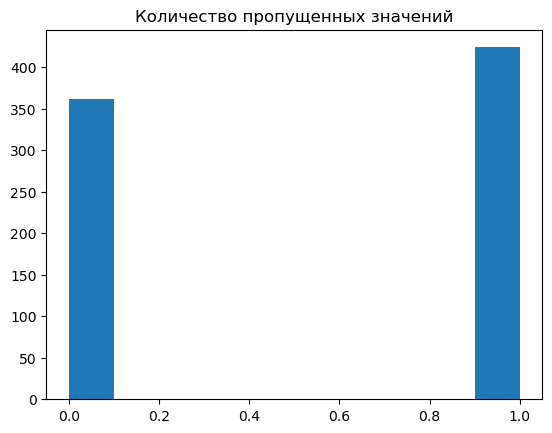

In [3]:
plt.hist(train.isna().sum())
plt.title("Количество пропущенных значений")
plt.show()

> Можно видеть, что количество пропусков незначительно

In [4]:
train = train.dropna()
train.shape

(17039, 786)

> Предыдущее предположение было верно и очистив датасет от нанов мы удалили 1 картинку

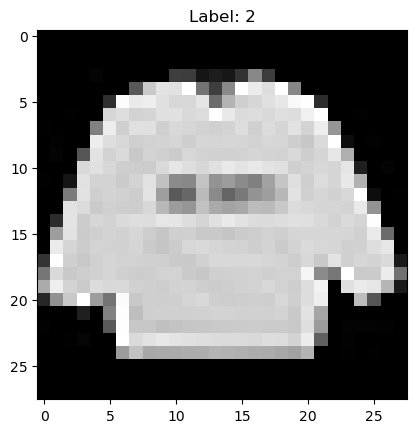

In [5]:
X, y = train.iloc[:, 1:].drop(
    columns=["Id"]).values, train.iloc[:, 0].values # Дропнем столбец ID который аналогичен индексу

# Отобразим первый элемент
image = X[0].reshape(28, 28)
plt.imshow(image, cmap='gray')
plt.title(f"Label: {y[0]}")
plt.show()

In [6]:
# Разделим на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

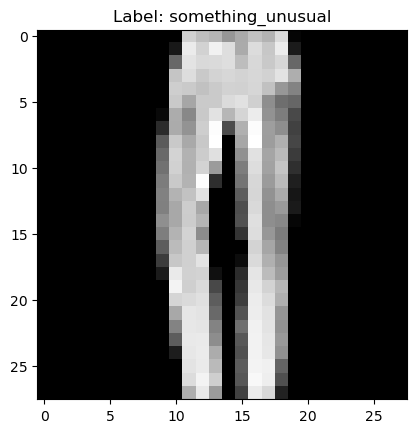

In [7]:
# Инициализируем валидационный датасет
valid = pd.read_csv("./data/fmnist_test.csv")
X_valid = valid.drop(columns=["Id"]).values

# Отобразим второй элемент
image = X_valid[1].reshape(28, 28)
plt.imshow(image, cmap='gray')
plt.title("Label: something_unusual")
plt.show()

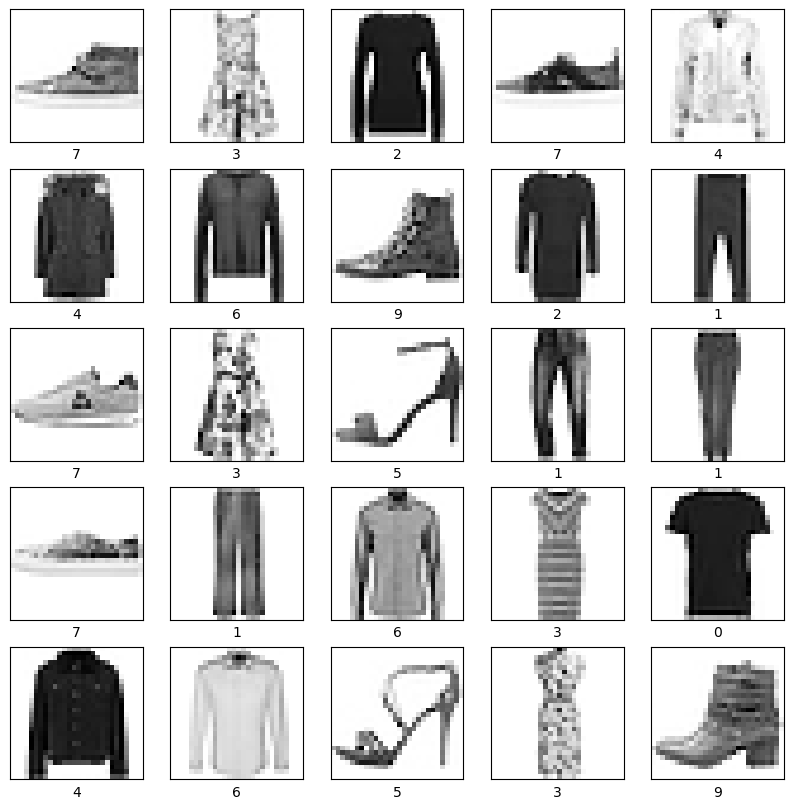

In [8]:
# Посмотрим побольше примеров
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28, 28)), cmap="Greys")
    plt.xlabel(y_train[i])
plt.show()

In [9]:
# Начинаем преобразовывать размерности входных данных для подачи на сверточные слои
X_train_reshaped = X_train.reshape(-1, 28, 28).astype('float32')
X_test_reshaped = X_test.reshape(-1, 28, 28).astype('float32')
X_valid_reshaped = X_valid.reshape(-1, 28, 28).astype('float32') # cразу отформатируем валидационный сет для формирования предсказания

# Добавляем размер канала: (num_samples, 28, 28, 1)
X_train_cnn = X_train_reshaped.reshape(-1, 28, 28, 1)
X_test_cnn = X_test_reshaped.reshape(-1, 28, 28, 1)
X_valid_cnn = X_valid_reshaped.reshape(-1, 28, 28, 1) # cразу отформатируем валидационный сет для формирования предсказания

# Нормируем и центрируем
X_train_float = X_train_cnn / 255 - 0.5
X_test_float = X_test_cnn / 255 - 0.5
X_valid_float = X_valid_cnn / 255 - 0.5 # cразу отформатируем валидационный сет для формирования предсказания

# one-hot encode для ответов
y_train_oh = keras.utils.to_categorical(y_train, 10)
y_test_oh = keras.utils.to_categorical(y_test, 10)

/opt/homebrew/Caskroom/miniconda/base/envs/dlenv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-13 07:41:54.189596: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-05-13 07:41:54.189825: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-05-13 07:41:54.189838: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-05-13 07:41:54.190036: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-05-13 07:41:54.190054: I tensorflow/core/common_runtime/pluggable_device/plugg

Epoch 1/30


2025-05-13 07:41:55.297995: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


213/213 ━━━━━━━━━━━━━━━━━━━━ 15s 55ms/step - accuracy: 0.5967 - loss: 1.2725 - val_accuracy: 0.1053 - val_loss: 4.3271
Epoch 2/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - accuracy: 0.7721 - loss: 0.6438 - val_accuracy: 0.3718 - val_loss: 3.2960
Epoch 3/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - accuracy: 0.8274 - loss: 0.4846 - val_accuracy: 0.7242 - val_loss: 0.9910
Epoch 4/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - accuracy: 0.8394 - loss: 0.4391 - val_accuracy: 0.8653 - val_loss: 0.3724
Epoch 5/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - accuracy: 0.8625 - loss: 0.3796 - val_accuracy: 0.8747 - val_loss: 0.3474
Epoch 6/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - accuracy: 0.8694 - loss: 0.3591 - val_accuracy: 0.8680 - val_loss: 0.3596
Epoch 7/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - accuracy: 0.8803 - loss: 0.3281 - val_accuracy: 0.8650 - val_loss: 0.3741
Epoch 8/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.8870 - loss: 0.3213 - val_accurac

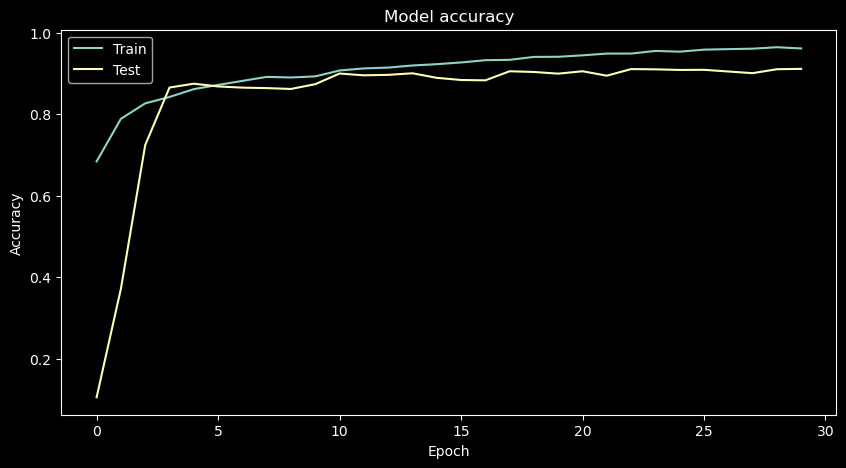

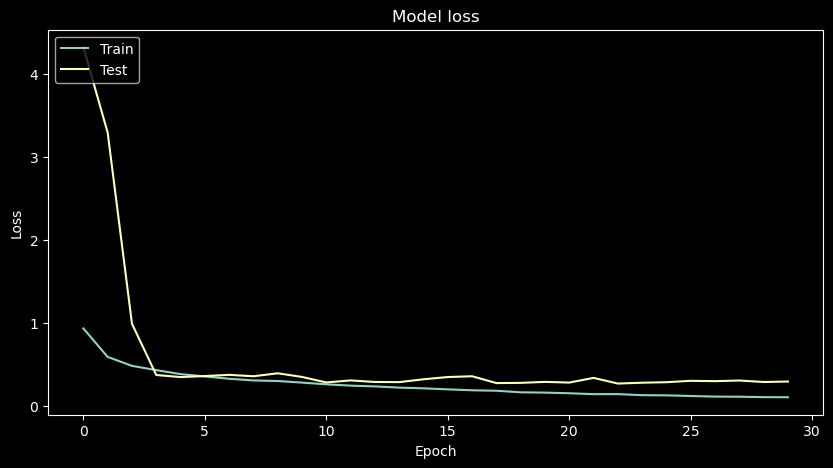

107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Test Accuracy: 0.9110915492957746


In [10]:
model = models.Sequential()

# Свёрточные слои
model.add(layers.Conv2D(32, (5,5), activation='relu', padding='same', input_shape=(28,28,1)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (5,5), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (5,5), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (5,5), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.3))

# ЭЭксперименты
# model.add(layers.Conv2D(128, (5,5), activation='relu', padding='same'))
# model.add(layers.BatchNormalization())
# model.add(layers.Conv2D(128, (5,5), activation='relu', padding='same'))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPooling2D((2,2)))
# model.add(layers.Dropout(0.25))


# Глобальный пуллинг
model.add(layers.Conv2D(256, (5,5), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.GlobalAveragePooling2D())

# Полносвязные слои
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# Инициализируем оптимизатор для выбора его параметров
optimizer = optimizers.Adam(learning_rate=0.0005) 

# Соберем модель
model.compile(
    loss='categorical_crossentropy',  # минимизируем кросс-энтропию
    optimizer=optimizer, 
    metrics=['accuracy']  # выводим процент правильных ответов
)

# Начнем обучение
history = model.fit(
                    X_train_float,
                    y_train_oh,
                    batch_size=64,  # 64 объекта для подсчета градиента на каждом шаге
                    epochs=30,  # 30 проходов по датасету
                    validation_data=(X_test_float, y_test_oh)
                    )

# Построим кривые обучения и потерь на тренировочном и тестовом прогонах
plt.style.use(['dark_background'])
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.style.use(['dark_background'])
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Получение вероятностей для каждого класса
predictions = model.predict(X_test_float)

# Преобразование вероятностей в предсказанные классы
predicts = predictions.argmax(axis=1)  # axis=1 для one-hot выхода модели

# Тевтовая акураси
print('Test Accuracy:', accuracy_score(y_test, predicts))

In [11]:
# Валидационное предсказание

# Получение вероятностей для каждого класса
predictions_val = model.predict(X_valid_float)

# Преобразование вероятностей в предсказанные классы
predicts_val = predictions_val.argmax(
    axis=1)  # axis=1 для one-hot выхода модели

# Сохранение предсказания в виде файла
temp = pd.Series(predicts_val).reset_index()
temp.rename(columns={"index": "Id", 0: "label"}).to_csv(
    "./data/sample_submission_2.csv", index=0)

# Проверим что похоже на нужный формат
pd.read_csv("./data/sample_submission_2.csv")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


,Id,label
0,0,0
1,1,1
2,2,2
3,3,6
4,4,3
...,...,...
9995,9995,0
9996,9996,6
9997,9997,8
9998,9998,8
